In [174]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [175]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
import os;
df=pd.read_csv('/Users/vineethpetnakota/downloads/instagram_data.csv')
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [177]:
df.shape

(11692, 14)

In [178]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

In [179]:
df.isnull().sum()

owner_id              0
owner_username        2
shortcode             2
is_video              2
caption             161
comments              2
likes                 2
created_at            3
location           7169
imageUrl              3
multiple_images       3
username           2115
followers          2115
following          2115
dtype: int64

In [180]:
df.dtypes

owner_id            object
owner_username      object
shortcode           object
is_video            object
caption             object
comments            object
likes               object
created_at         float64
location            object
imageUrl            object
multiple_images     object
username            object
followers          float64
following          float64
dtype: object

In [181]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [182]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [184]:
sid = SentimentIntensityAnalyzer()

In [185]:
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [186]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [187]:
df['sentiment'] = df['caption'].astype(str).apply(analyze_sentiment)

In [188]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [189]:
df['sentiment'] = df['caption'].astype(str).apply(analyze_sentiment)

In [190]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,sentiment
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,Positive
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Positive
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Positive
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Neutral
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Neutral


In [191]:
df.columns

Index(['owner_id', 'owner_username', 'shortcode', 'is_video', 'caption',
       'comments', 'likes', 'created_at', 'location', 'imageUrl',
       'multiple_images', 'username', 'followers', 'following', 'sentiment'],
      dtype='object')

In [192]:
df[['owner_username','caption','sentiment']]

,owner_username,caption,sentiment
0,christendominique,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,Positive
1,christendominique,😮‍💨Brow tips I really wish I would have know w...,Positive
2,christendominique,OMG I can’t believe it’s already been 1 yr sin...,Positive
3,christendominique,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,Neutral
4,christendominique,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,Neutral
...,...,...,...
11687,m_eye_nd,which one is your fav 🥺💛🌌🌊🥀,Positive
11688,m_eye_nd,do you miss that? 🥺💛😭,Negative
11689,m_eye_nd,"but it is wonderful while it lasts, right? 🥺💛",Positive
11690,m_eye_nd,take a moment to see how far you've come🌼💛🥀,Neutral


In [193]:
df['emotion'] = [
    'happy' if (x == 'Positive') else
    'sad' if (x == 'Negative' ) else
    'neutral'
    for x in df['sentiment']]

In [194]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,sentiment,emotion
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,Positive,happy
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Positive,happy
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Positive,happy
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Neutral,neutral
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Neutral,neutral


In [195]:
df[['owner_username','caption','sentiment','emotion']]

,owner_username,caption,sentiment,emotion
0,christendominique,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,Positive,happy
1,christendominique,😮‍💨Brow tips I really wish I would have know w...,Positive,happy
2,christendominique,OMG I can’t believe it’s already been 1 yr sin...,Positive,happy
3,christendominique,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,Neutral,neutral
4,christendominique,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,Neutral,neutral
...,...,...,...,...
11687,m_eye_nd,which one is your fav 🥺💛🌌🌊🥀,Positive,happy
11688,m_eye_nd,do you miss that? 🥺💛😭,Negative,sad
11689,m_eye_nd,"but it is wonderful while it lasts, right? 🥺💛",Positive,happy
11690,m_eye_nd,take a moment to see how far you've come🌼💛🥀,Neutral,neutral


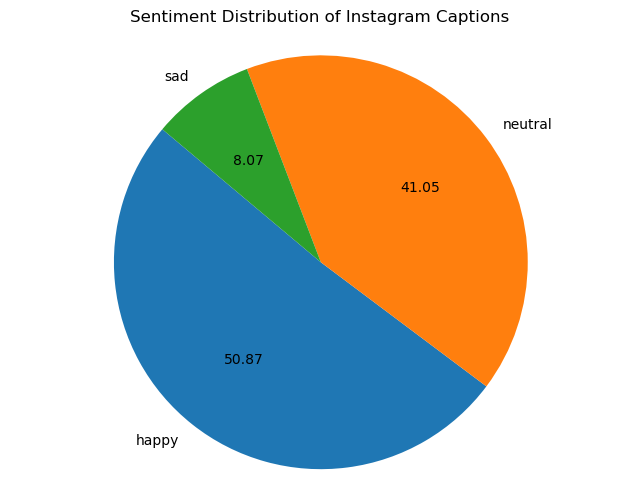

In [206]:
import matplotlib.pyplot as plt

# Count the number of captions for each sentiment category
sentiment_counts = df['emotion'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.2f', startangle=140)
plt.title('Sentiment Distribution of Instagram Captions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

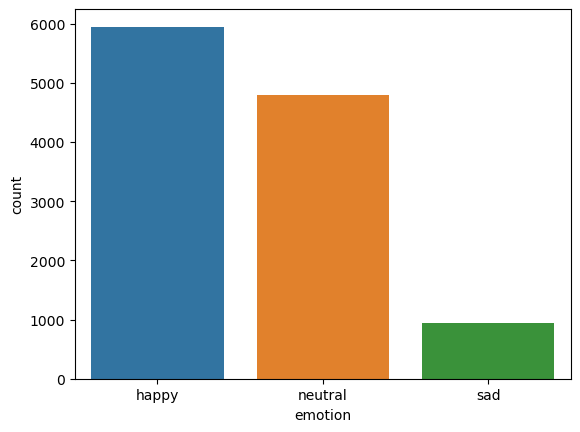

In [208]:
sns.countplot(x=df['emotion']); #representation of plot using bar graph